# HOMEWORK 2
For this homework you will have to complete and implement the colour balancing for:
* Gray world algorithm
* Scale-by-max algorithm

You are free to use your own images. Experiment with more images and think about the effect each of the algorithms has on the resulting (balanced) image.

### Colour Balancing
In this notebook we will show different type of colour balancing making use of von Kries' hypothesis.

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

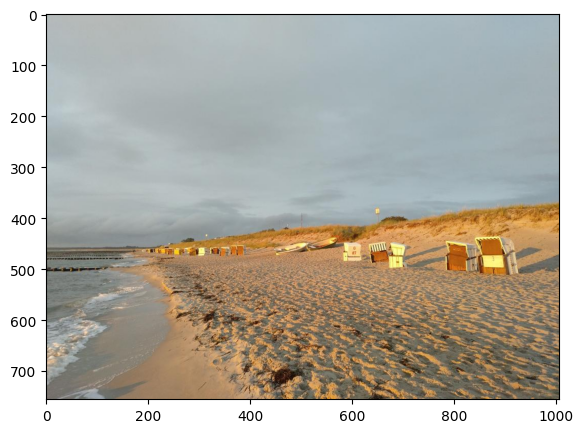

In [2]:
img = cv2.imread('data/sea.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

### White patch
In white patch algorithm we choose a group of pixels we know they should be white. We then scale the resulting image colour channels by this white patch.

(<Axes: >, <matplotlib.image.AxesImage at 0x1f70ecfa090>)

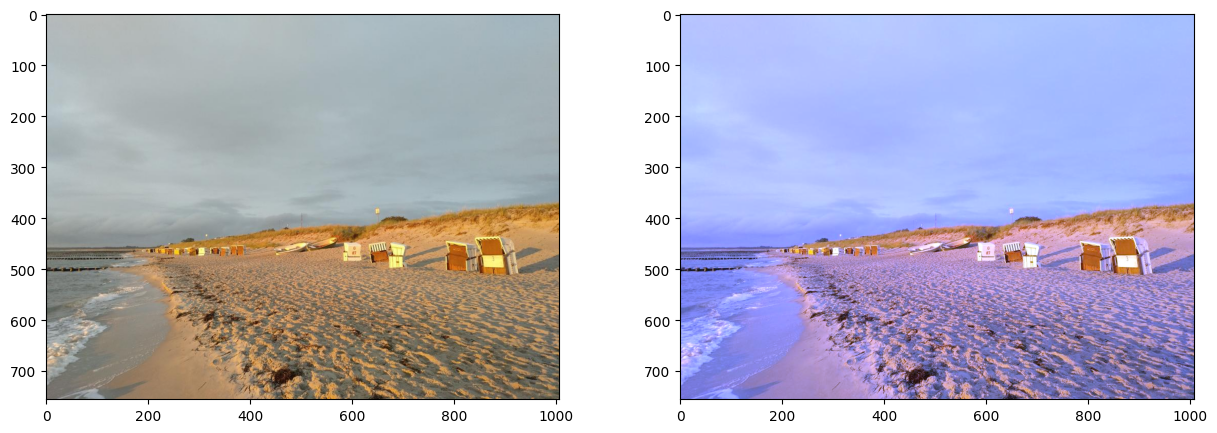

In [3]:
# Define white patch and the coefficients
row, col = 485, 864 
white = img[row, col, :]
coeffs = 255.0/white

# Apply white balancing and generate balanced image
balanced = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced[..., channel] = img[..., channel] * coeffs[channel]

# White patching does not guarantee that the dynamic range is preserved, images must be clipped.
balanced = balanced/255
balanced[balanced > 1] = 1

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

### Gray world
This algorithm assumes that a scene, on average, is gray.

Original image means: mean_r = 162.25918577307465, mean_g = 156.81538170823885, mean_b = 144.0787745653817
Coeffs are  [1, np.float64(1.0347147327356203), np.float64(1.1261838273023541)]


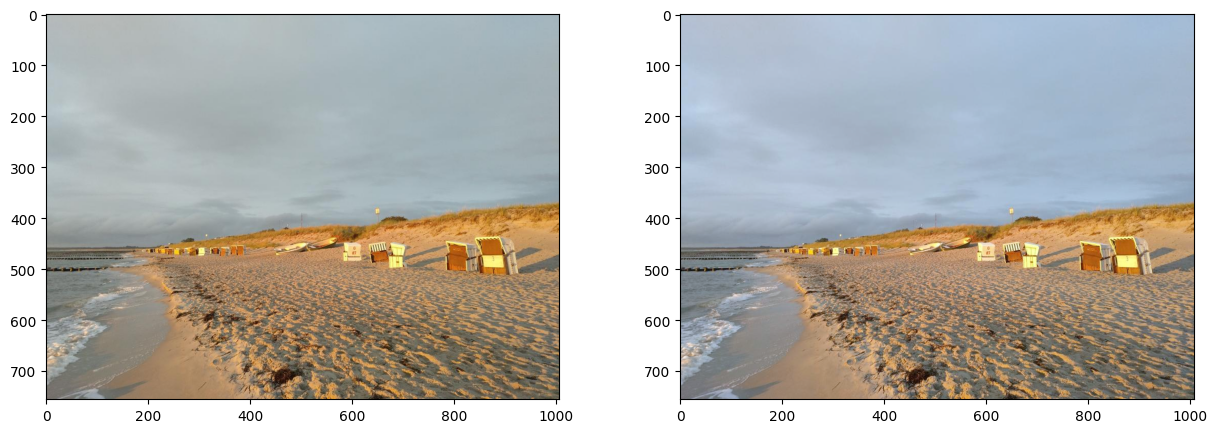

In [4]:
# Load your image
img = cv2.imread("data/sea.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


def gray_world(img):
    # Compute the mean values for all three colour channels (red, green, blue)
    red, green, blue = cv2.split(img)
    mean_r = np.mean(red)
    mean_g = np.mean(green)
    mean_b = np.mean(blue)
    
    # Compute the coefficients kr, kg, kb
    # Note: there are 3 coefficients to compute but we only have 2 equations.
    # Therefore, you have to make an assumption, fix the value of one of the
    # coefficients and compute the remining two
    # Hint: You can fix the coefficient of the brightest colour channel to 1.
    kr = 1
    kg = kr*mean_r/mean_g
    kb = kr*mean_r/mean_b
    
    coeffs = [kr, kg, kb]
    
    # Apply color balancing and generate the balanced image
    balanced = np.zeros_like(img, dtype=np.float32)
    for channel in range(3):
        balanced[..., channel] = img[..., channel] * coeffs[channel]
    # clipping
    balanced = balanced / 255
    balanced[balanced > 1] = 1
    # Show the original and the balanced image side by side\
    print(f"Original image means: mean_r = {mean_r}, mean_g = {mean_g}, mean_b = {mean_b}") 
    print(f"Coeffs are ", coeffs)
    plt.subplot(121), plt.imshow(img)
    plt.subplot(122), plt.imshow(balanced)

gray_world(img)
# the result significantly increased blue in the image, as kb is the biggest, the sky looks more blue, compared to gray in the original image

The result increased blue in the image, as kb is the highest, the sky looks more blue, compared to gray in the original image.

In contrast to white patch, red was not affected as coeff kr = 1.


Original image means: mean_r = 31.542393715896143, mean_g = 100.37527732805661, mean_b = 124.6621844456437
Coeffs are  [1, np.float64(0.3142446482394874), np.float64(0.25302295043329304)]


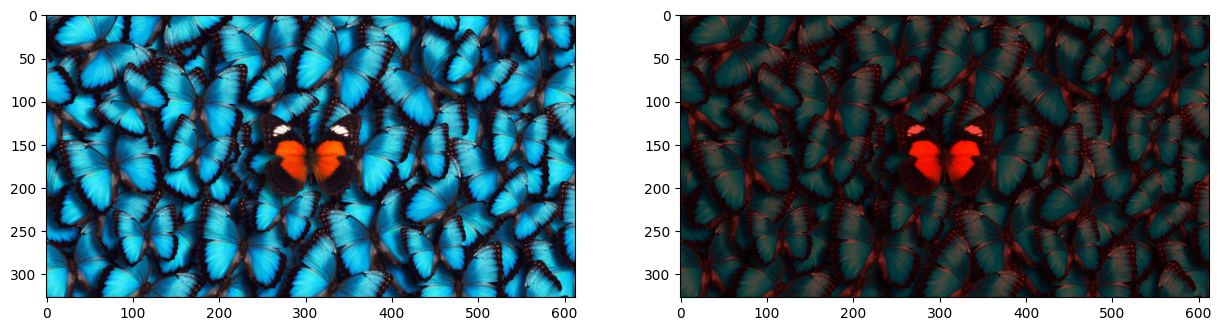

In [5]:
# another example to see how will it look like on very blue image
# Load your image
img = cv2.imread("data/blue.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gray_world(img)



#### For the image above, the gray world is a poor assumption, as the image actually has a lot of blue

#### Next image was done in the red lighting, lets see how the gray_world manages it

Original image means: mean_r = 137.58438071357676, mean_g = 58.85638614637204, mean_b = 44.06694576906143
Coeffs are  [1, np.float64(2.3376287557209725), np.float64(3.1221673822053755)]


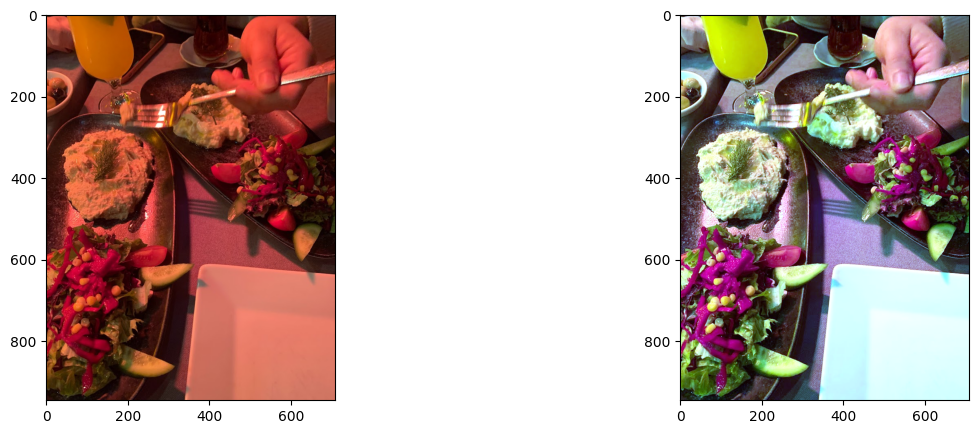

In [6]:
# Load your image
img = cv2.imread('data/red_lighting.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gray_world(img)

Nice result!!!

### Scale-by-max
This is a straightforward algorithm that scales each colour channel by its maximum value. Note that it is sensitive to noise and saturations.

Maxs are: max_r = 255, max_g = 255, max_b = 237 


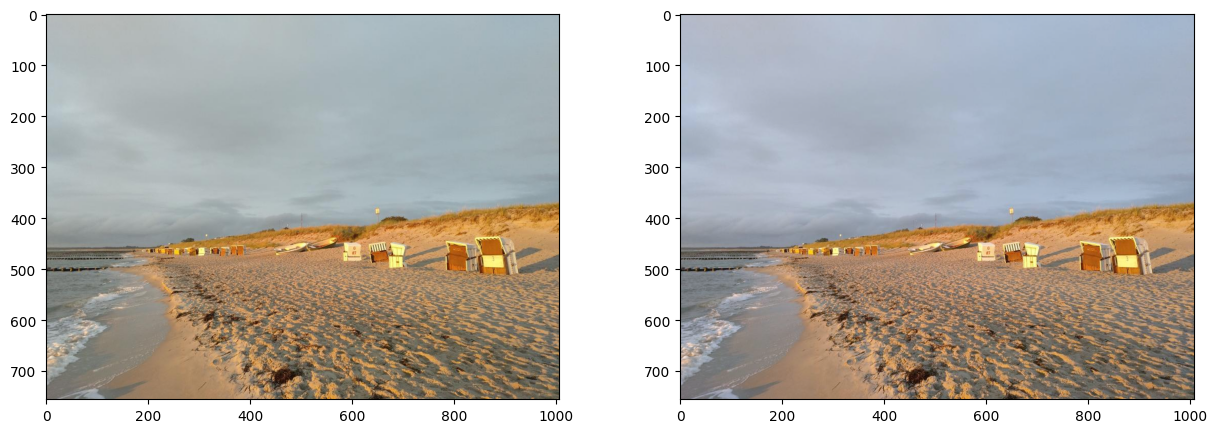

In [7]:
# Load your image
img = cv2.imread('data/sea.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Compute the maximum values for all three colour channels (red, green, blue)
def scale_by_max(img):
    red, green, blue = cv2.split(img)
    max_r = np.max(red)
    max_g = np.max(green)
    max_b = np.max(blue)
    
    coeffs = [1/max_r, 1/max_g, 1/max_b]
    # Apply scale-by-max balancing and generate the balanced image
    balanced = balanced = np.zeros_like(img, dtype=np.float32)
    for channel in range(3):
        balanced[..., channel] = img[..., channel] * coeffs[channel]
    
    print(f"Maxs are: max_r = {max_r}, max_g = {max_g}, max_b = {max_b} ")
    # print(np.mean(img))
    # print(np.mean(balanced))

    # red, green, blue = cv2.split(balanced)
    # max_r = int(np.max(red)*255)
    # max_g = int(np.max(green)*255)
    # max_b = int(np.max(blue)*255)

    # print(f"Maxs after balancing are: max_r = {max_r}, max_g = {max_g}, max_b = {max_b} ")
    
    plt.subplot(121), plt.imshow(img)
    plt.subplot(122), plt.imshow(balanced)
scale_by_max(img)

Maxs are: max_r = 255, max_g = 255, max_b = 255 


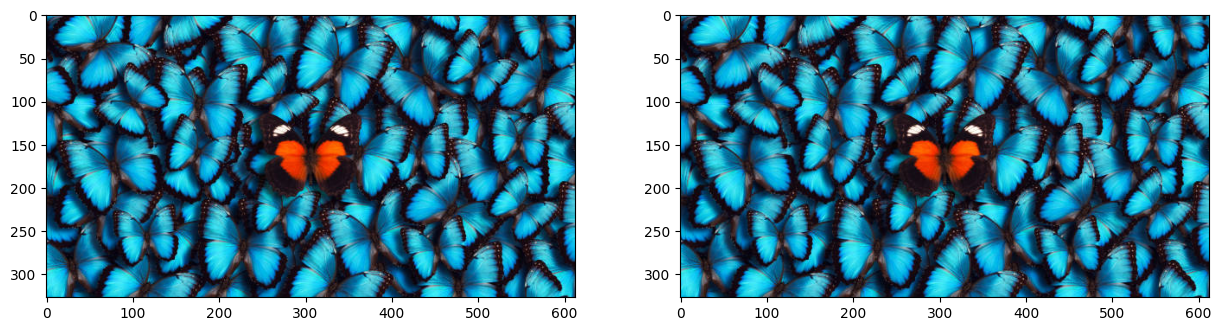

In [8]:
# Load your image
img = cv2.imread('data/blue.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

scale_by_max(img)


#### No effect from scale_by_max for the butterfly image, as all maxs are 255, 255, 255 

There is a high chance that the image is already preprocessed :)

Maxs are: max_r = 255, max_g = 255, max_b = 255 


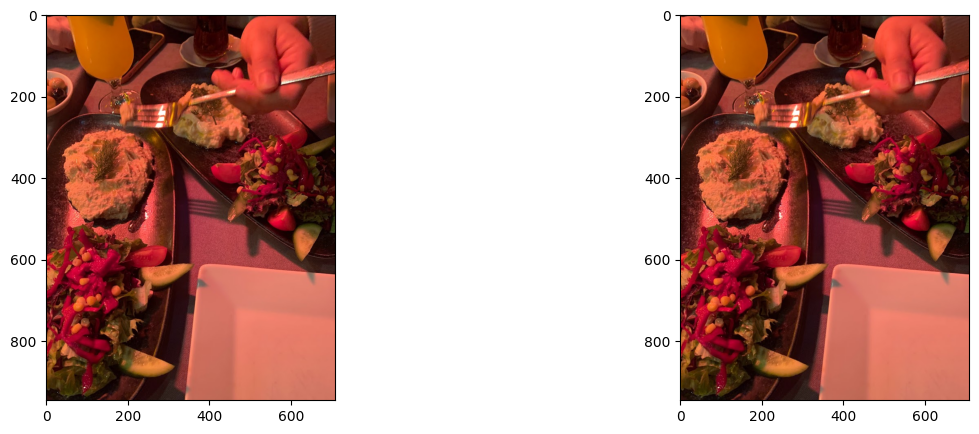

In [9]:
# Load your image
img = cv2.imread('data/red_lighting.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

scale_by_max(img)


again no effect as all maxs are 255

#### Found a darker image of a nighlight for scale_by_max

Maxs are: max_r = 63, max_g = 244, max_b = 255 


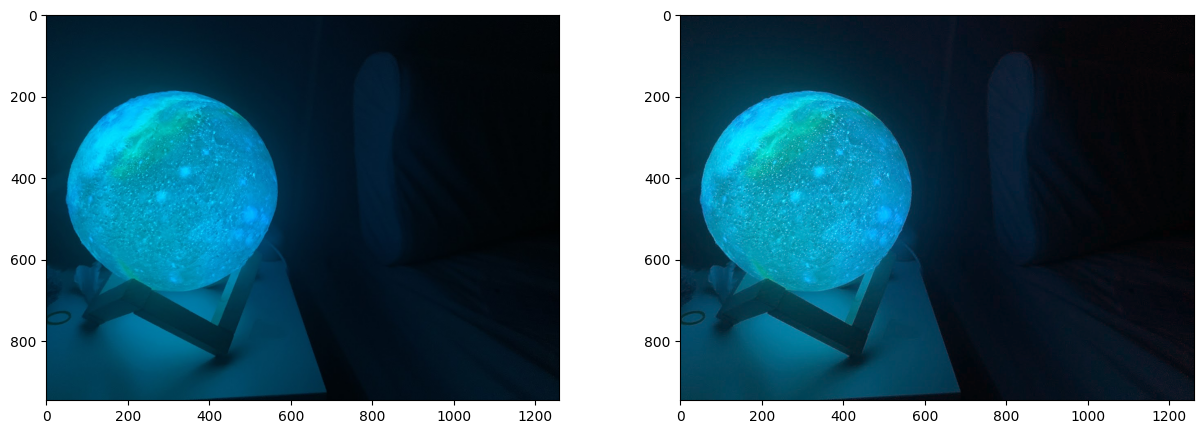

In [10]:
img = cv2.imread('data/nightlight.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

scale_by_max(img)

The yellowish spots on the nightlight are brigther now, but still hard to see the difference

Lets give it one more chance with the sunset sky in the city:


Maxs are: max_r = 255, max_g = 238, max_b = 255 


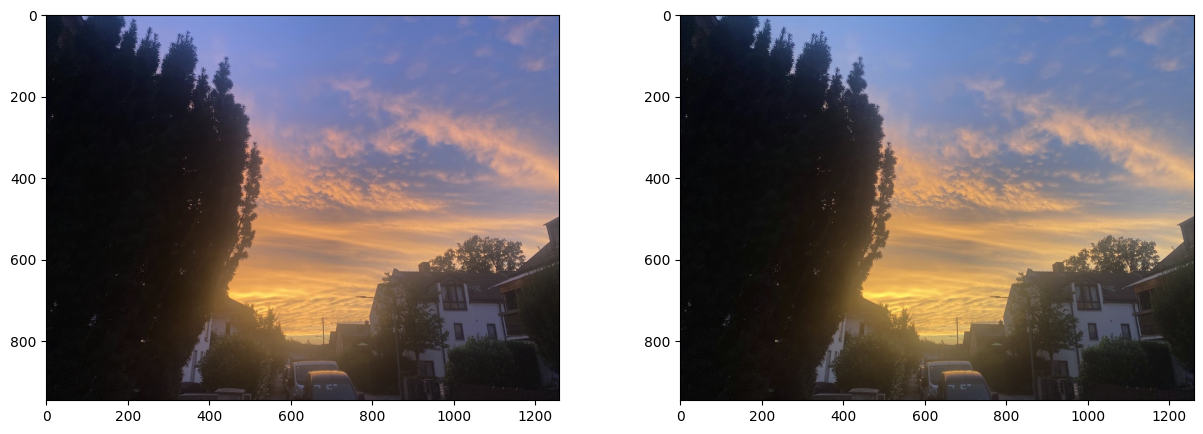

In [11]:
img = cv2.imread('data/citysky.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

scale_by_max(img)

At least the sky is more blue now, instead of purplish